In [46]:
# Initial imports
import os
import requests

%matplotlib inline

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

import hvplot.pandas
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import panel as pn
pn.extension('plotly')
import os
from MCForecastTools import MCSimulation
from dotenv import load_dotenv
import warnings
warnings.filterwarnings('ignore')

In [47]:
btc_url = 'https://rest.coinapi.io/v1/ohlcv/BTC/USD/history?apikey=1F21A0B9-8943-4DCB-95F7-E72293E8852B&period_id=1DAY&time_start=2021-01-01&time_end=2021-05-01&Accept: application/json'



In [48]:
import json

In [49]:

requests.get(btc_url)
btc_data = requests.get(btc_url)
btc_content = btc_data.content
print(btc_content)

b'[\n  {\n    "time_period_start": "2021-01-01T00:00:00.0000000Z",\n    "time_period_end": "2021-01-02T00:00:00.0000000Z",\n    "time_open": "2021-01-01T00:00:00.2102810Z",\n    "time_close": "2021-01-01T23:59:59.7847540Z",\n    "price_open": 28990.080000000,\n    "price_high": 29700.000000000,\n    "price_low": 28672.300000000,\n    "price_close": 29412.840000000,\n    "volume_traded": 38271.462809088,\n    "trades_count": 326394\n  },\n  {\n    "time_period_start": "2021-01-02T00:00:00.0000000Z",\n    "time_period_end": "2021-01-03T00:00:00.0000000Z",\n    "time_open": "2021-01-02T00:00:00.2184930Z",\n    "time_close": "2021-01-02T23:59:59.4810790Z",\n    "price_open": 29413.290000000,\n    "price_high": 33333.000000000,\n    "price_low": 29028.700000000,\n    "price_close": 32225.910000000,\n    "volume_traded": 87675.545105983,\n    "trades_count": 608895\n  },\n  {\n    "time_period_start": "2021-01-03T00:00:00.0000000Z",\n    "time_period_end": "2021-01-04T00:00:00.0000000Z",\n  

In [50]:

btc_hist = btc_data.json()
print(json.dumps(btc_hist, indent=4))



[
    {
        "time_period_start": "2021-01-01T00:00:00.0000000Z",
        "time_period_end": "2021-01-02T00:00:00.0000000Z",
        "time_open": "2021-01-01T00:00:00.2102810Z",
        "time_close": "2021-01-01T23:59:59.7847540Z",
        "price_open": 28990.08,
        "price_high": 29700.0,
        "price_low": 28672.3,
        "price_close": 29412.84,
        "volume_traded": 38271.462809088,
        "trades_count": 326394
    },
    {
        "time_period_start": "2021-01-02T00:00:00.0000000Z",
        "time_period_end": "2021-01-03T00:00:00.0000000Z",
        "time_open": "2021-01-02T00:00:00.2184930Z",
        "time_close": "2021-01-02T23:59:59.4810790Z",
        "price_open": 29413.29,
        "price_high": 33333.0,
        "price_low": 29028.7,
        "price_close": 32225.91,
        "volume_traded": 87675.545105983,
        "trades_count": 608895
    },
    {
        "time_period_start": "2021-01-03T00:00:00.0000000Z",
        "time_period_end": "2021-01-04T00:00:00.00000

In [51]:
btc_close=[]
btc_day=[]

In [52]:

for day in btc_hist:
    btc_close.append(day['price_close'])
    btc_day.append(day['time_period_start'])

In [53]:
len(btc_close)

100

In [54]:
btc_df=pd.DataFrame({'day': btc_day, 'close':btc_close})

In [55]:
btc_df.head()

,day,close
0,2021-01-01T00:00:00.0000000Z,29412.84
1,2021-01-02T00:00:00.0000000Z,32225.91
2,2021-01-03T00:00:00.0000000Z,33080.66
3,2021-01-04T00:00:00.0000000Z,32005.88
4,2021-01-05T00:00:00.0000000Z,34039.05


In [56]:
btc_df.dtypes

day       object
close    float64
dtype: object

In [57]:
btc_df['day']=pd.to_datetime(btc_df['day']).dt.normalize()

In [58]:
btc_df.dtypes


day      datetime64[ns, UTC]
close                float64
dtype: object

In [59]:
btc_df.head()

,day,close
0,2021-01-01 00:00:00+00:00,29412.84
1,2021-01-02 00:00:00+00:00,32225.91
2,2021-01-03 00:00:00+00:00,33080.66
3,2021-01-04 00:00:00+00:00,32005.88
4,2021-01-05 00:00:00+00:00,34039.05


In [60]:
btc_df.set_index('day', inplace = True)
btc_df.head()

,close
day,
2021-01-01 00:00:00+00:00,29412.84
2021-01-02 00:00:00+00:00,32225.91
2021-01-03 00:00:00+00:00,33080.66
2021-01-04 00:00:00+00:00,32005.88
2021-01-05 00:00:00+00:00,34039.05


In [61]:
btc_df.index=btc_df.index.date
btc_df.head()

,close
2021-01-01,29412.84
2021-01-02,32225.91
2021-01-03,33080.66
2021-01-04,32005.88
2021-01-05,34039.05


In [62]:
btc_df.to_pickle('btc.pkl')

In [63]:
doge_url = 'https://rest.coinapi.io/v1/ohlcv/DOGE/USD/history?apikey=1F21A0B9-8943-4DCB-95F7-E72293E8852B&period_id=1DAY&time_start=2021-01-01&time_end=2021-05-01&Accept: application/json'

In [64]:
requests.get(doge_url)
doge_data = requests.get(doge_url)
doge_content = doge_data.content
print(doge_content)

b'[\n  {\n    "time_period_start": "2021-01-01T00:00:00.0000000Z",\n    "time_period_end": "2021-01-02T00:00:00.0000000Z",\n    "time_open": "2021-01-01T00:06:00.3680000Z",\n    "time_close": "2021-01-01T23:59:42.3730000Z",\n    "price_open": 0.004680400,\n    "price_high": 0.005760600,\n    "price_low": 0.004604000,\n    "price_close": 0.005707900,\n    "volume_traded": 242655963.640856490,\n    "trades_count": 2387\n  },\n  {\n    "time_period_start": "2021-01-02T00:00:00.0000000Z",\n    "time_period_end": "2021-01-03T00:00:00.0000000Z",\n    "time_open": "2021-01-02T00:01:23.1690000Z",\n    "time_close": "2021-01-02T23:59:51.1100000Z",\n    "price_open": 0.005776000,\n    "price_high": 0.014282400,\n    "price_low": 0.005578500,\n    "price_close": 0.010577600,\n    "volume_traded": 2187930913.997354170,\n    "trades_count": 28416\n  },\n  {\n    "time_period_start": "2021-01-03T00:00:00.0000000Z",\n    "time_period_end": "2021-01-04T00:00:00.0000000Z",\n    "time_open": "2021-01-03

In [65]:
doge_hist = doge_data.json()
print(json.dumps(doge_hist, indent=4))


[
    {
        "time_period_start": "2021-01-01T00:00:00.0000000Z",
        "time_period_end": "2021-01-02T00:00:00.0000000Z",
        "time_open": "2021-01-01T00:06:00.3680000Z",
        "time_close": "2021-01-01T23:59:42.3730000Z",
        "price_open": 0.0046804,
        "price_high": 0.0057606,
        "price_low": 0.004604,
        "price_close": 0.0057079,
        "volume_traded": 242655963.6408565,
        "trades_count": 2387
    },
    {
        "time_period_start": "2021-01-02T00:00:00.0000000Z",
        "time_period_end": "2021-01-03T00:00:00.0000000Z",
        "time_open": "2021-01-02T00:01:23.1690000Z",
        "time_close": "2021-01-02T23:59:51.1100000Z",
        "price_open": 0.005776,
        "price_high": 0.0142824,
        "price_low": 0.0055785,
        "price_close": 0.0105776,
        "volume_traded": 2187930913.997354,
        "trades_count": 28416
    },
    {
        "time_period_start": "2021-01-03T00:00:00.0000000Z",
        "time_period_end": "2021-01-04T00:

In [66]:
doge_close=[]
doge_day=[]

In [67]:
for day in doge_hist:
    doge_close.append(day['price_close'])
    doge_day.append(day['time_period_start'])

In [68]:
doge_df=pd.DataFrame({'day': doge_day, 'close':doge_close})

In [69]:
doge_df.head()

,day,close
0,2021-01-01T00:00:00.0000000Z,0.005708
1,2021-01-02T00:00:00.0000000Z,0.010578
2,2021-01-03T00:00:00.0000000Z,0.009846
3,2021-01-04T00:00:00.0000000Z,0.009792
4,2021-01-05T00:00:00.0000000Z,0.010000


In [70]:
doge_df.dtypes

day       object
close    float64
dtype: object

In [71]:
doge_df['day']= pd.to_datetime(doge_df['day']).dt.normalize()


In [72]:
doge_df.dtypes

day      datetime64[ns, UTC]
close                float64
dtype: object

In [73]:
doge_df.head()

,day,close
0,2021-01-01 00:00:00+00:00,0.005708
1,2021-01-02 00:00:00+00:00,0.010578
2,2021-01-03 00:00:00+00:00,0.009846
3,2021-01-04 00:00:00+00:00,0.009792
4,2021-01-05 00:00:00+00:00,0.010000


In [74]:
doge_df.set_index('day', inplace = True)
doge_df.head()

,close
day,
2021-01-01 00:00:00+00:00,0.005708
2021-01-02 00:00:00+00:00,0.010578
2021-01-03 00:00:00+00:00,0.009846
2021-01-04 00:00:00+00:00,0.009792
2021-01-05 00:00:00+00:00,0.010000


In [75]:
doge_df.index=doge_df.index.date
doge_df.head()

,close
2021-01-01,0.005708
2021-01-02,0.010578
2021-01-03,0.009846
2021-01-04,0.009792
2021-01-05,0.010000


In [76]:
doge_df.to_pickle('doge.pkl')

In [77]:
doge_df_returns = doge_df.pct_change().dropna()
btc_df_returns = btc_df.pct_change().dropna()

In [78]:
doge_df_returns

,close
2021-01-02,0.853151
2021-01-03,-0.069146
2021-01-04,-0.005464
2021-01-05,0.021200
2021-01-06,0.045800
2021-01-07,-0.066016
2021-01-08,0.002703
2021-01-09,0.045313
2021-01-10,-0.035457
2021-01-11,-0.113329


In [79]:
btc_df_returns


,close
2021-01-02,0.095641
2021-01-03,0.026524
2021-01-04,-0.032490
2021-01-05,0.063525
2021-01-06,0.082852
2021-01-07,0.071795
2021-01-08,0.029401
2021-01-09,-0.010073
2021-01-10,-0.051664
2021-01-11,-0.070464


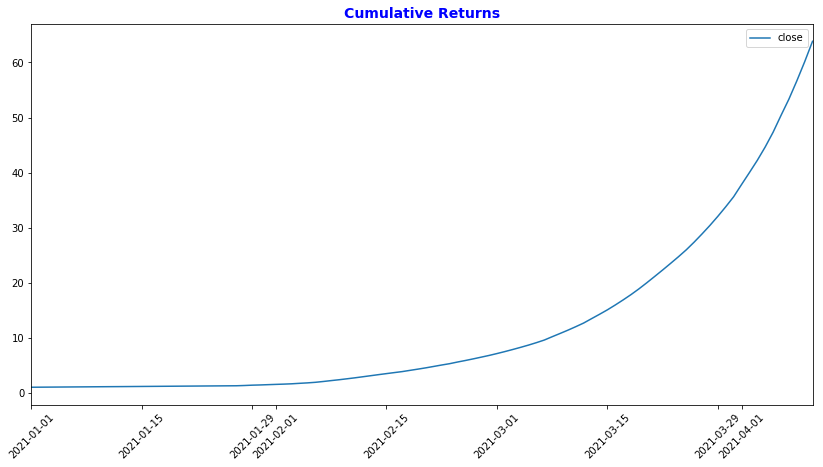

In [80]:
cum_doge = (1 + doge_df).cumprod()
cum_doge_plot = cum_doge.plot(figsize=(14, 7), rot=45)
cum_doge_plot = cum_doge_plot.set_title('Cumulative Returns', fontsize=14, fontweight="bold", color="blue") 

In [81]:
cum_doge_plot.figure.savefig('PNG/cum_doge_plot.png')

In [82]:
cum_doge_plot

Text(0.5, 1.0, 'Cumulative Returns')

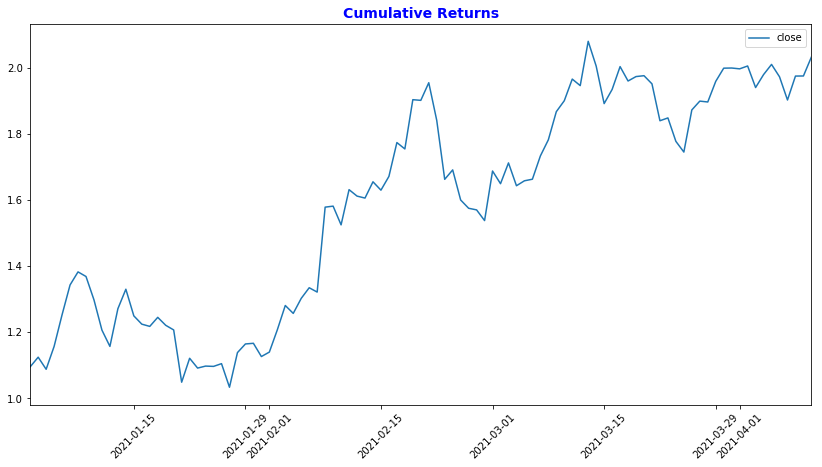

In [83]:
cum_btc = (1 + btc_df_returns).cumprod()
cum_btc_plot = cum_btc.plot(figsize=(14, 7),rot=45)
#, xlabel="Date", ylabel="Percent Return"
cum_btc_plot = cum_btc_plot.set_title('Cumulative Returns', fontsize=14, fontweight="bold", color="blue") 

In [84]:
cum_btc_plot.figure.savefig('PNG/cum_btc_plot.png')